In [1]:
%load_ext autoreload
%autoreload 2
import mkl
mkl.set_num_threads(1)

48

In [2]:
#%run ../../core/prepare_histograms.py
#%run ../../core/event_numbers.py

# Imports

In [3]:
import pickle
import numpy as np
import astropy.units as u

import cartopy.crs as ccrs
from matplotlib.lines import Line2D
from tools import *
from settings import *
import matplotlib.pyplot as plt
import seaborn as sns

Could not import healpy.
functions plot_area, add_catalog, and add_extended_plane will not work.


# coordinates

In [4]:
### colorful
if True:
    poles["IceCube"]["color"] = "k"
    poles["P-ONE"]["color"] = "#a50000"
    poles["KM3NeT"]["color"] = colors[1] #"#a50000"
    poles["Baikal-GVD"]["color"] = "purple"
else:
    ### p-one highlight
    poles["IceCube"]["color"] = "k"
    poles["P-ONE"]["color"] = "#a50000"
    poles["KM3NeT"]["color"] = colors[0]
    poles["Baikal-GVD"]["color"] = colors[2]

# Cartopy

🌍


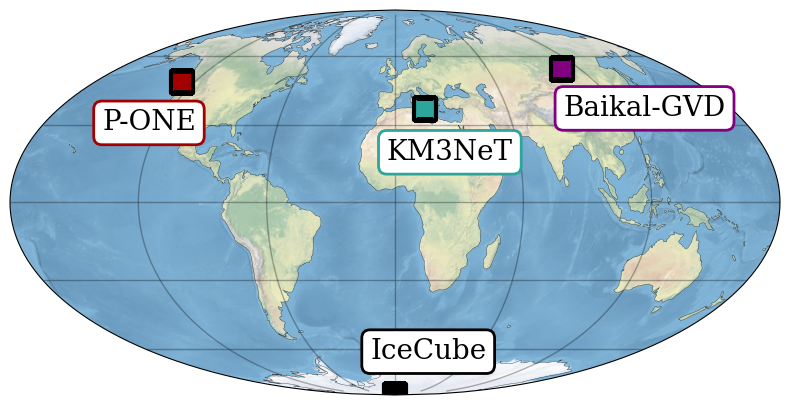

In [5]:
fig = plt.figure(figsize=(10, 5))

central_longitude = 0 #poles["P-ONE"]["lon"].value # centered on p-oe longitude

ax = fig.add_subplot(
    projection=ccrs.Mollweide(central_longitude=central_longitude)
)
ax.set_global()
ax.stock_img()
ax.coastlines(color="k", alpha=0.7)
gl = ax.gridlines(draw_labels=False, alpha=0.3, color="k")
edc = "k"
for i, (name, new_pole) in enumerate(sorted(poles.items())):
    if "Plenum" in name or "Gen" in name:
        continue
    ax.scatter(
        np.degrees(new_pole["lon"]),
        np.degrees(new_pole["lat"]),
        s=230,
        alpha=1,
        marker="s",
        c=[new_pole["color"]],
        edgecolors=edc,
        lw=3,
        label=name,
        transform=ccrs.PlateCarree(),
        zorder=10,
    )
    if name=="IceCube": continue
    ax.text(
        x=new_pole["lon"].value - 20,
        y=new_pole["lat"].value - 20,
        s=name,
        transform=ccrs.PlateCarree(),
        fontsize=20,
        bbox=dict(boxstyle="round", fc="w", linewidth=2, ec=new_pole["color"])
    )
ax.text(
    x=central_longitude - 20,
    y=-65,
    s="IceCube",
    transform=ccrs.PlateCarree(),
    fontsize=20,
    bbox=dict(boxstyle="round", fc="w", linewidth=2, ec=poles["IceCube"]["color"])
)
plt.savefig(join(BASEPATH, "plots/maps/map_overview.pdf"))
plt.savefig(join(BASEPATH, "plots/maps/map_overview.png"), transparent=True)
#plt.savefig(join(BASEPATH, "plots/maps/map_overview_P-ONE.pdf"))
print("\U0001F30D")


🌍


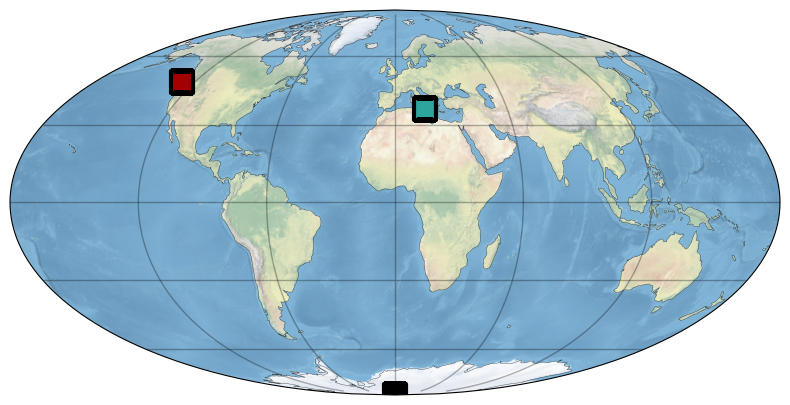

In [8]:
fig = plt.figure(figsize=(10, 5))

central_longitude = 0 #poles["P-ONE"]["lon"].value # centered on p-one longitude

ax = fig.add_subplot(
    projection=ccrs.Mollweide(central_longitude=central_longitude)
)
ax.set_global()
ax.stock_img()
ax.coastlines(color="k", alpha=0.7)
gl = ax.gridlines(draw_labels=False, alpha=0.3, color="k")
edc = "k"
for name in ["IceCube", "KM3NeT", "P-ONE"]:
    ax.scatter(
        np.degrees(poles[name]["lon"]),
        np.degrees(poles[name]["lat"]),
        s=230,
        alpha=1,
        marker="s",
        c=[poles[name]["color"]],
        edgecolors=edc,
        lw=3,
        label=name,
        transform=ccrs.PlateCarree(),
        zorder=10,
    )

#plt.savefig(join(BASEPATH, "plots/maps/map_overview_noLabel.pdf"))
plt.savefig(join(BASEPATH, "plots/maps/map_overview_noLabel.png"), transparent=True)
print("\U0001F30D")


🌍


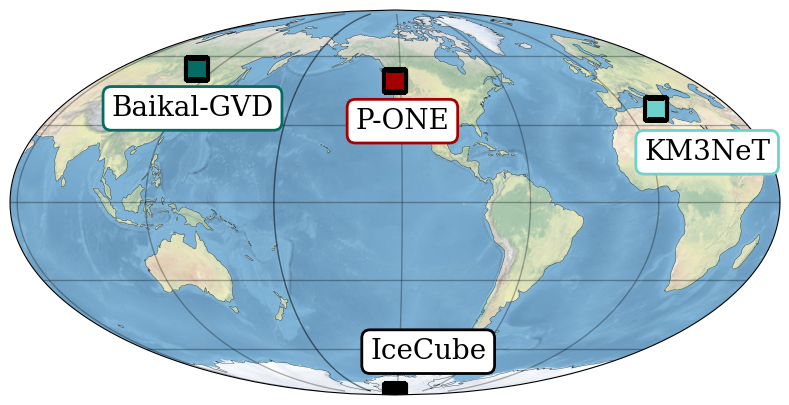

In [ ]:
fig = plt.figure(figsize=(10, 5))

central_longitude = poles["P-ONE"]["lon"].value # centered on p-oe longitude

ax = fig.add_subplot(
    projection=ccrs.Mollweide(central_longitude=central_longitude)
)
ax.set_global()
ax.stock_img()
ax.coastlines(color="k", alpha=0.7)
gl = ax.gridlines(draw_labels=False, alpha=0.3, color="k")
edc = "k"
for i, (name, new_pole) in enumerate(sorted(poles.items())):
    if "Plenum" in name or "Gen" in name:
        continue
    ax.scatter(
        np.degrees(new_pole["lon"]),
        np.degrees(new_pole["lat"]),
        s=230,
        alpha=1,
        marker="s",
        c=[new_pole["color"]],
        edgecolors=edc,
        lw=3,
        label=name,
        transform=ccrs.PlateCarree(),
        zorder=10,
    )
    if name=="IceCube": continue
    ax.text(
        x=new_pole["lon"].value - 20,
        y=new_pole["lat"].value - 20,
        s=name,
        transform=ccrs.PlateCarree(),
        fontsize=20,
        bbox=dict(boxstyle="round", fc="w", linewidth=2, ec=new_pole["color"])
    )
ax.text(
    x=central_longitude - 20,
    y=-65,
    s="IceCube",
    transform=ccrs.PlateCarree(),
    fontsize=20,
    bbox=dict(boxstyle="round", fc="w", linewidth=2, ec=poles["IceCube"]["color"])
)
plt.savefig(join(BASEPATH, "plots/maps/map_overview_P-ONE.pdf"))
print("\U0001F30D")


# Baseline plot 

In [15]:
from tools import add_plane

Could not import healpy.
functions plot_area, add_catalog, and add_extended_plane will not work.


In [24]:
poles["IceCube"]["color"] = "k"
poles["P-ONE"]["color"] = "#a50000"
poles["KM3NeT"]["color"] = colors[1] #"#a50000"
poles["Baikal-GVD"]["color"] = "purple"

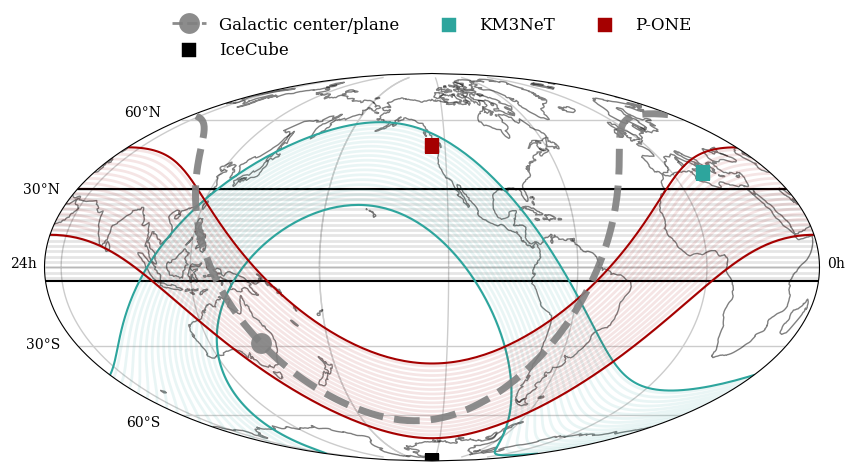

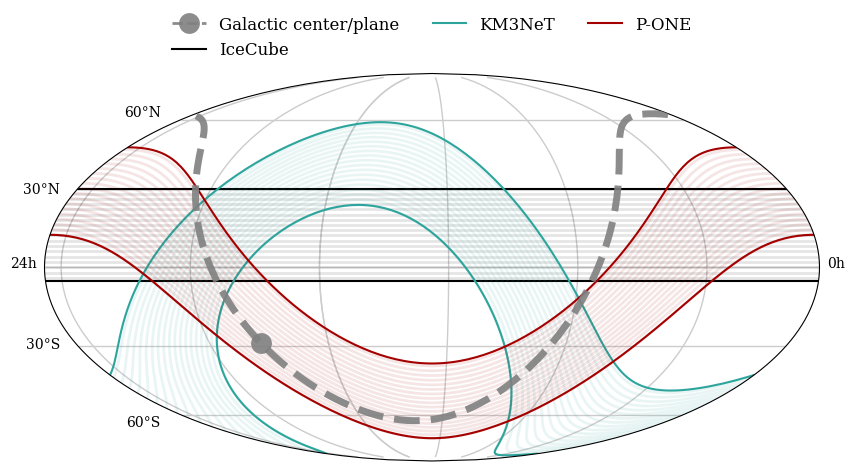

In [31]:
clon = poles["P-ONE"]["lon"].value #0
for with_coastlines in [True, False]:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(projection=ccrs.Mollweide(central_longitude=clon))
    ax.set_global()

    if with_coastlines:
        ax.coastlines(color="k", alpha=0.5, lw=1)
    ax.gridlines(draw_labels=False, dms=True, x_inline=False, y_inline=False, zorder=0)
    ax.text(-0.01, 0.5, "24h", transform=ax.transAxes, ha="right")
    ax.text(1.01, 0.5, "0h", transform=ax.transAxes, ha="left")
    ax.text(0.15, 0.9, "60°N", transform=ax.transAxes, ha="right", va="center")
    ax.text(0.02, 0.7, "30°N", transform=ax.transAxes, ha="right", va="center")
    ax.text(0.02, 0.3, "30°S", transform=ax.transAxes, ha="right", va="center")
    ax.text(0.15, 0.1, "60°S", transform=ax.transAxes, ha="right", va="center")

    # add_obj(
    #     ax,
    #     "txs",
    #     marker=r"$\bigoplus$",
    #     c="k",
    #     transform=ccrs.PlateCarree(central_longitude=clon),
    #     markeredgewidth=2,
    #     zorder=10,
    # )
    # add_obj(
    #     ax,
    #     "ngc",
    #     marker=r"$\bigotimes$",
    #     c="k",
    #     transform=ccrs.PlateCarree(central_longitude=clon),
    #     markeredgewidth=2,
    #     zorder=10,
    # )
    add_plane(
        ax,
        color="0.5",
        transform=ccrs.PlateCarree(central_longitude=clon),
        zorder=10,
        alpha=0.9,
        lw=5,
        ls="--",
    )

    zen_min = -30
    zen_max = 5
    azi = np.linspace(0, 360, num=200)
    zen1 = np.full_like(azi, zen_min)
    zen2 = np.full_like(azi, zen_max)
    for k in ["IceCube", "KM3NeT", "P-ONE"]:
        if with_coastlines:
            ax.scatter(
                poles[k]["lon"].value,
                poles[k]["lat"].value,
                color=poles[k]["color"],
                marker="s",
                s=100,
                transform=ccrs.PlateCarree(),
                label=k,
                zorder=10,
            )
        rotated_crs = ccrs.RotatedPole(
            pole_longitude=poles[k]["lon"].value,
            pole_latitude=poles[k]["lat"].value,
        )
        ax.plot(
            azi,
            zen1,
            transform=rotated_crs,
            color=poles[k]["color"],
            lw=1.5,
            alpha=1,
            label=k if not with_coastlines else None,
        )
        ax.plot(azi, zen2, transform=rotated_crs, color=poles[k]["color"], lw=1.5, alpha=1)

        for i in range(zen_min, zen_max, 2):
            zen = np.full_like(azi, i)
            ax.plot(
                azi,
                zen,
                transform=rotated_crs,
                color=poles[k]["color"],
                lw=2,
                alpha=0.1,
            )
    plt.subplots_adjust(top=0.8)
    ax.legend(
        fontsize="large",
        loc="lower center",
        ncol=3,
        frameon=False,
        bbox_to_anchor=(0.5, 1.0),
    )
    # fig.tight_layout()
    base_file = join(
        BASEPATH, f"plots/maps/best_field_of_view_map_00_p-one-centered"
    )  # _with_TRIDENT")
    if with_coastlines:
        base_file += "_with_coastlines"
    fig.savefig(base_file + ".pdf", bbox_inches="tight")
    fig.savefig(base_file + ".png", bbox_inches="tight")

# Baseline P-ONE plot

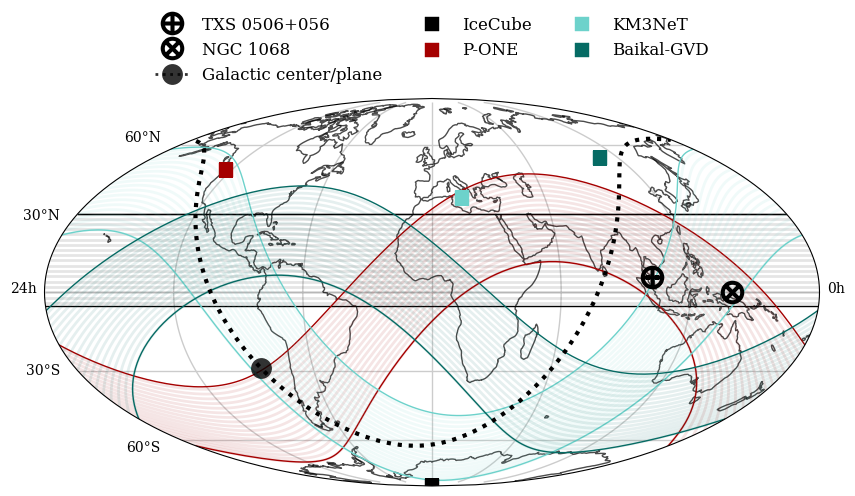

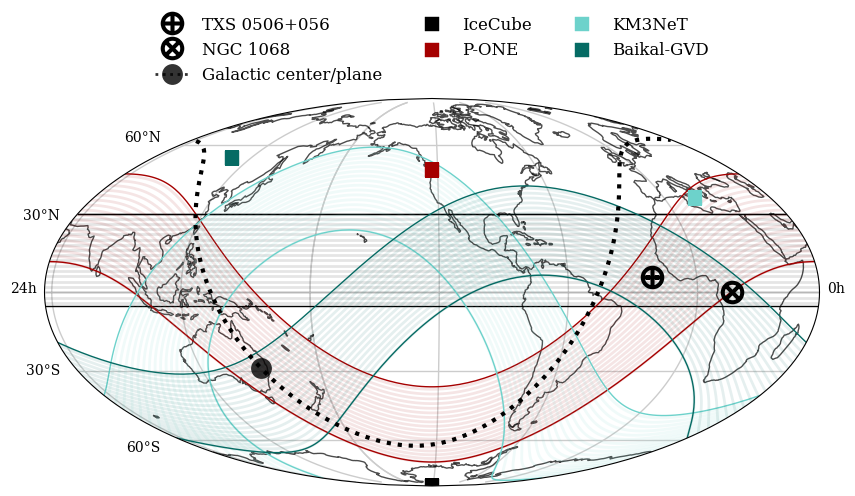

In [14]:
for ii, clon in enumerate([0, poles["P-ONE"]["lon"].value]):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(projection=ccrs.Mollweide(central_longitude=clon))
    ax.set_global()
    ax.coastlines(color="k", alpha=0.7, lw=1)
    ax.gridlines(draw_labels=False, dms=True, x_inline=False, y_inline=False, zorder=0)
    ax.text(-0.01, 0.5, "24h", transform=ax.transAxes, ha="right")
    ax.text(1.01, 0.5, "0h", transform=ax.transAxes, ha="left")
    ax.text(0.15, 0.9, "60°N", transform=ax.transAxes, ha="right", va="center")
    ax.text(0.02, 0.7, "30°N", transform=ax.transAxes, ha="right", va="center")
    ax.text(0.02, 0.3, "30°S", transform=ax.transAxes, ha="right", va="center")
    ax.text(0.15, 0.1, "60°S", transform=ax.transAxes, ha="right", va="center")

    add_obj(
        ax,
        "txs",
        marker=r"$\bigoplus$",
        c="k",
        transform=ccrs.PlateCarree(central_longitude=clon),
        markeredgewidth=2,
        zorder=10,
    )
    add_obj(
        ax,
        "ngc",
        marker=r"$\bigotimes$",
        c="k",
        transform=ccrs.PlateCarree(central_longitude=clon),
        markeredgewidth=2,
        zorder=10,
    )
    add_plane(
        ax, color="black", transform=ccrs.PlateCarree(central_longitude=clon), zorder=10
    )

    zen_min = -30
    zen_max = 5
    azi = np.linspace(0, 360, num=200)
    zen1 = np.full_like(azi, zen_min)
    zen2 = np.full_like(azi, zen_max)
    for k in poles:
        ax.scatter(
            poles[k]["lon"].value,
            poles[k]["lat"].value,
            color=poles[k]["color"],
            marker="s",
            s=100,
            transform=ccrs.PlateCarree(),
            label=k,
            zorder=10,
        )
        rotated_crs = ccrs.RotatedPole(
            pole_longitude=poles[k]["lon"].value,
            pole_latitude=poles[k]["lat"].value,
        )
        ax.plot(
            azi, zen1, transform=rotated_crs, color=poles[k]["color"], lw=1, alpha=1
        )
        ax.plot(
            azi, zen2, transform=rotated_crs, color=poles[k]["color"], lw=1, alpha=1
        )

        for i in range(zen_min, zen_max, 2):
            zen = np.full_like(azi, i)
            ax.plot(
                azi,
                zen,
                transform=rotated_crs,
                color=poles[k]["color"],
                lw=2,
                alpha=0.1,
            )
    plt.subplots_adjust(top=0.8)
    ax.legend(
        fontsize="large",
        loc="lower center",
        ncol=3,
        frameon=False,
        bbox_to_anchor=(0.5, 1.0),
    )
    # fig.tight_layout()
    base_file = join(BASEPATH, f"plots/maps/best_field_of_view_map_{ii}") #_with_TRIDENT")
    fig.savefig(base_file + ".pdf", bbox_inches="tight")
    fig.savefig(base_file + ".png", bbox_inches="tight")


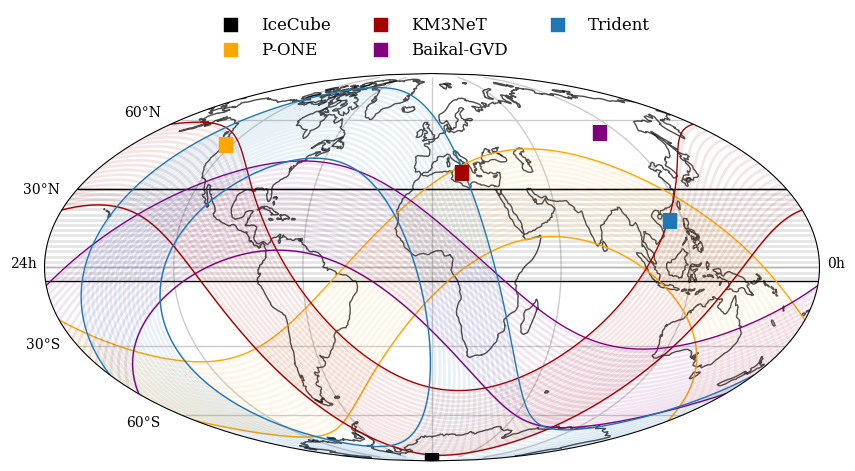

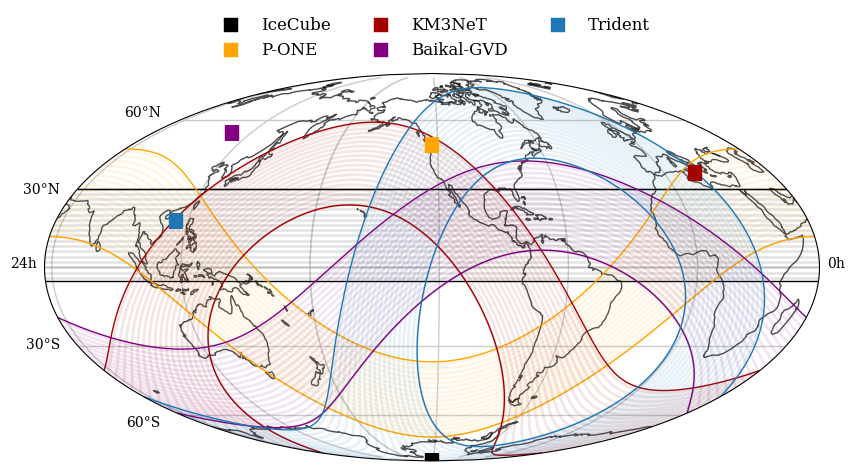

In [9]:
# without objects
for ii, clon in enumerate([0, poles["P-ONE"]["lon"].value]):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(projection=ccrs.Mollweide(central_longitude=clon))
    ax.set_global()
    ax.coastlines(color="k", alpha=0.7, lw=1)
    ax.gridlines(draw_labels=False, dms=True, x_inline=False, y_inline=False, zorder=0)
    ax.text(-0.01, 0.5, "24h", transform=ax.transAxes, ha="right")
    ax.text(1.01, 0.5, "0h", transform=ax.transAxes, ha="left")
    ax.text(0.15, 0.9, "60°N", transform=ax.transAxes, ha="right", va="center")
    ax.text(0.02, 0.7, "30°N", transform=ax.transAxes, ha="right", va="center")
    ax.text(0.02, 0.3, "30°S", transform=ax.transAxes, ha="right", va="center")
    ax.text(0.15, 0.1, "60°S", transform=ax.transAxes, ha="right", va="center")

    zen_min = -30
    zen_max = 5
    azi = np.linspace(0, 360, num=200)
    zen1 = np.full_like(azi, zen_min)
    zen2 = np.full_like(azi, zen_max)
    for k in poles:
        ax.scatter(
            poles[k]["lon"].value,
            poles[k]["lat"].value,
            color=poles[k]["color"],
            marker="s",
            s=100,
            transform=ccrs.PlateCarree(),
            label=k,
            zorder=10,
        )
        rotated_crs = ccrs.RotatedPole(
            pole_longitude=poles[k]["lon"].value,
            pole_latitude=poles[k]["lat"].value,
        )
        ax.plot(
            azi, zen1, transform=rotated_crs, color=poles[k]["color"], lw=1, alpha=1
        )
        ax.plot(
            azi, zen2, transform=rotated_crs, color=poles[k]["color"], lw=1, alpha=1
        )

        for i in range(zen_min, zen_max, 2):
            zen = np.full_like(azi, i)
            ax.plot(
                azi,
                zen,
                transform=rotated_crs,
                color=poles[k]["color"],
                lw=2,
                alpha=0.1,
            )
    plt.subplots_adjust(top=0.8)
    ax.legend(
        fontsize="large",
        loc="lower center",
        ncol=3,
        frameon=False,
        bbox_to_anchor=(0.5, 1.0),
    )
    # fig.tight_layout()
    base_file = join(BASEPATH, f"plots/maps/best_field_of_view_map_{ii}_with_TRIDENT")
    fig.savefig(base_file + ".pdf", bbox_inches="tight")


# Catalogs

In [8]:
# _3FHL = np.load('../resources/3FHL_All_2019.npy')
# _4FGL = np.load('../resources/4FGL.npy')

tracks = np.load(join(BASEPATH, "resources/tracks.npy"))
ang_unc = np.empty(len(tracks), dtype=float)
for i, ra_err in enumerate(tracks["ra_err"]):
    name = tracks["name"][i]
    if b"HES" in name and not b"AHES" in name:
        ang_unc[i] = ra_err[0]
    else:
        Dec_err = np.mean([tracks["dec_err"][i][0], -tracks["dec_err"][i][1]])
        Ra_err = np.mean([ra_err[0], -ra_err[1]])
        ang_unc[i] = conv2ang_uncertainty(Ra_err, Dec_err, tracks["dec"][i])
tracks = np.lib.recfunctions.append_fields(
    tracks, names="sigma", data=ang_unc, dtypes=float, usemask=False
)


# Create a skymap including the ps detection efficiency and all HE tracks 

## get all detection efficiencies $\propto N_{detected}$ per fixed livetime

In [5]:
with open(join(LOCALPATH, "detection_efficiencies.pckl"), "rb") as f:
    tcks, padded_sd = pickle.load(f)


## IceCube only

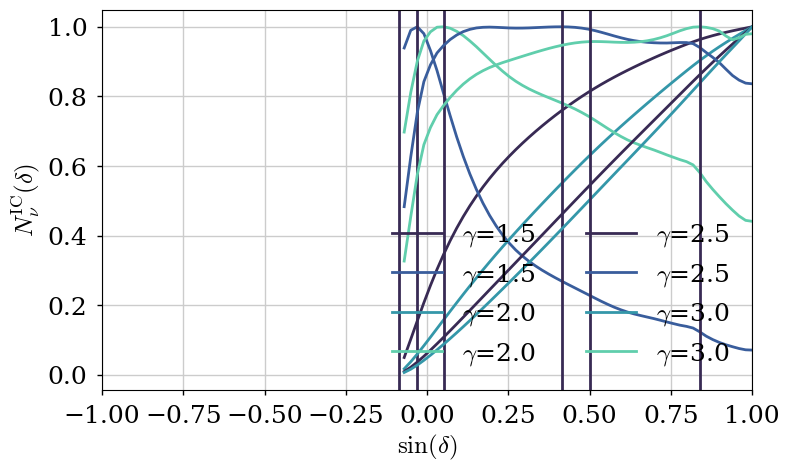

In [6]:
sindec_vals = np.linspace(-1, 1, 100)
gammas = [1.5, 2.0, 2.5, 3.0]
fig, ax = plt.subplots()
for gamma in gammas:
    eff = np.exp(tcks[gamma]["IceCube"](sindec_vals)) * LIVETIME * PHI_0
    mask = sindec_vals >= np.sin(np.deg2rad(-5))
    p = ax.plot(sindec_vals[mask], np.cumsum(eff[mask]) / np.sum(eff[mask]), label=r"$\gamma$={0:.1f}".format(gamma))
    p = ax.plot(sindec_vals[mask], eff[mask] / np.max(eff[mask]), label=r"$\gamma$={0:.1f}".format(gamma))
    ax.axvline(sindec_vals[mask][np.argmax(eff[mask])])

ax.legend(ncol=2, frameon=False, loc=4)
ax.set_xlabel(r"$\sin(\delta)$")
ax.set_ylabel(r"$N_{\nu}^{\rm IC}(\delta)$")

ax.set_xlim(-1, 1)

ax.axvline(np.sin(np.deg2rad(-5)))
ax.axvline(np.sin(np.deg2rad(30)))

fig.tight_layout()
plt.subplots_adjust(top=0.85)
# if False:
#     ax.set_yscale("log")
# else:
#     #plt.ylim(10, 30)
#     #plt.xlim(-0.2, 0.55)


## all detectors
equal contribution, detection efficiency relative to icecube at respective declination

1.5
PLENUM-1 Improv at GC: 6.31231088753793
PLENUM-1 Improv at txs0506: 2.461844718161991
PLENUM-1 Improv at ngc1068: 2.001214889103848

PLENUM-2 Improv at GC: 12.812326756176535
PLENUM-2 Improv at txs0506: 8.961837420138952
PLENUM-2 Improv at ngc1068: 8.501237129153951
- - - - - - - - - - 
2.0
PLENUM-1 Improv at GC: 28.641333032414572
PLENUM-1 Improv at txs0506: 2.3798340407961467
PLENUM-1 Improv at ngc1068: 2.43919584066394

PLENUM-2 Improv at GC: 35.1413492233732
PLENUM-2 Improv at txs0506: 8.879833758477542
PLENUM-2 Improv at ngc1068: 8.939191895841581
- - - - - - - - - - 
2.5
PLENUM-1 Improv at GC: 286.55003289518766
PLENUM-1 Improv at txs0506: 2.5143091040057146
PLENUM-1 Improv at ngc1068: 2.8157401213227025

PLENUM-2 Improv at GC: 293.05003684108374
PLENUM-2 Improv at txs0506: 9.014310730989388
PLENUM-2 Improv at ngc1068: 9.315767855306067
- - - - - - - - - - 
3.0
PLENUM-1 Improv at GC: 4097.95809216187
PLENUM-1 Improv at txs0506: 2.6391732504455034
PLENUM-1 Improv at ngc1068: 3

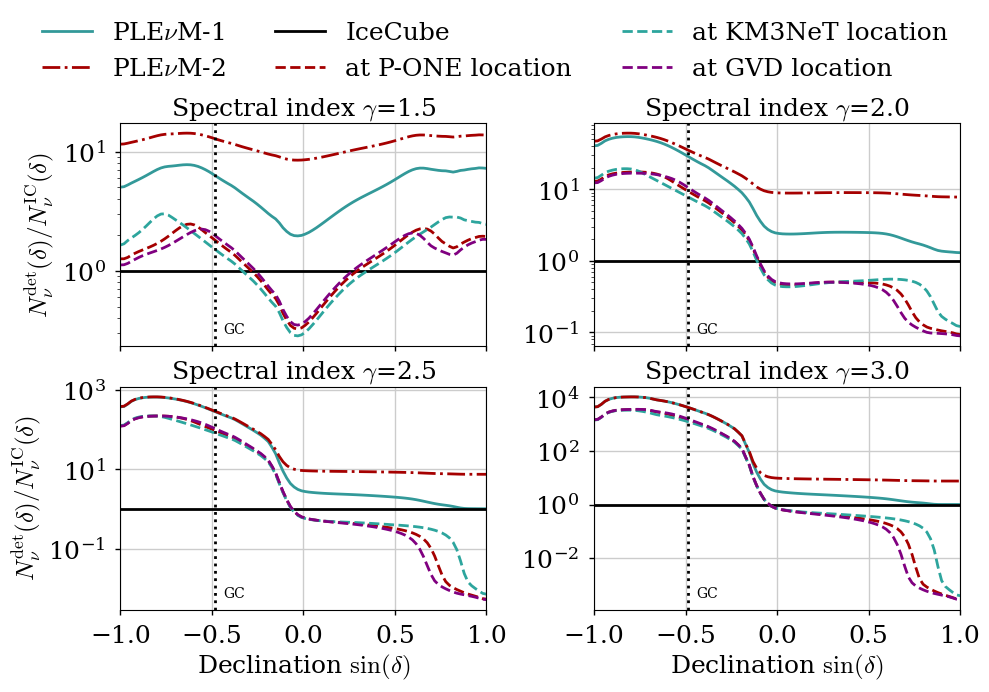

In [7]:
sindec_vals = np.linspace(-1, 1, 100)

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(10, 7))
axes = axes.flatten()
for ii, gamma in enumerate(gammas):
    ax = axes[ii]
    for det in tcks[gamma]:
        if "Gen" in det:
            continue
        Res = np.exp(tcks[gamma][det](sindec_vals)) / np.exp(
            tcks[gamma]["IceCube"](sindec_vals)
        )
        p = ax.plot(
            sindec_vals,
            Res,
            label=poles[det]["label"] if ii == 0 else "",
            color=poles[det]["color"],
            ls=poles[det]["ls"],
            lw=2,
        )
    ax.set_title(
        r"Spectral index $\gamma$={0:.1f}".format(gamma)
    )
    ax.axvline(np.sin(sgr_a.icrs.dec), color="k", ls=":")
    # ax.axvline(np.sin(txs0506.icrs.dec), color="k", ls=":")
    ax.set_yscale("log")
    ax.set_xlim(-1, 1)
    ax.text(0.28, 0.055, "GC", transform=ax.transAxes)
    # calculate the improvement with PLEnuM relative to IceCube
    if True:
        print(gamma)
        improv_sgr = np.exp(tcks[gamma]["Plenum-1"](np.sin(sgr_a.icrs.dec))) / np.exp(
            tcks[gamma]["IceCube"](np.sin(sgr_a.icrs.dec))
        )
        improv_txs0506 = np.exp(
            tcks[gamma]["Plenum-1"](np.sin(txs0506.icrs.dec))
        ) / np.exp(tcks[gamma]["IceCube"](np.sin(txs0506.icrs.dec)))
        improv_ngc1068 = np.exp(
            tcks[gamma]["Plenum-1"](np.sin(ngc1068.icrs.dec))
        ) / np.exp(tcks[gamma]["IceCube"](np.sin(ngc1068.icrs.dec)))
        print("PLENUM-1 Improv at GC:", improv_sgr)
        print("PLENUM-1 Improv at txs0506:", improv_txs0506)
        print("PLENUM-1 Improv at ngc1068:", improv_ngc1068)
        print("")

        improv_sgr = np.exp(tcks[gamma]["Plenum-2"](np.sin(sgr_a.icrs.dec))) / np.exp(
            tcks[gamma]["IceCube"](np.sin(sgr_a.icrs.dec))
        )
        improv_txs0506 = np.exp(
            tcks[gamma]["Plenum-2"](np.sin(txs0506.icrs.dec))
        ) / np.exp(tcks[gamma]["IceCube"](np.sin(txs0506.icrs.dec)))
        improv_ngc1068 = np.exp(
            tcks[gamma]["Plenum-2"](np.sin(ngc1068.icrs.dec))
        ) / np.exp(tcks[gamma]["IceCube"](np.sin(ngc1068.icrs.dec)))
        print("PLENUM-2 Improv at GC:", improv_sgr)
        print("PLENUM-2 Improv at txs0506:", improv_txs0506)
        print("PLENUM-2 Improv at ngc1068:", improv_ngc1068)
        print("- "*10)

axes[2].set_xlabel(r"Declination $\sin(\delta)$")
axes[3].set_xlabel(r"Declination $\sin(\delta)$")
axes[0].set_ylabel(r"$N_{\nu}^{\rm det}(\delta) / N_{\nu}^{\rm IC}(\delta)$")
axes[2].set_ylabel(r"$N_{\nu}^{\rm det}(\delta) / N_{\nu}^{\rm IC}(\delta)$")
fig.legend(loc="upper center", ncol=3, frameon=False)
fig.tight_layout()
plt.subplots_adjust(top=0.82)
fig.savefig(join(BASEPATH, "plots/relative_detection_eff_dIC_vs_sindec.pdf"))


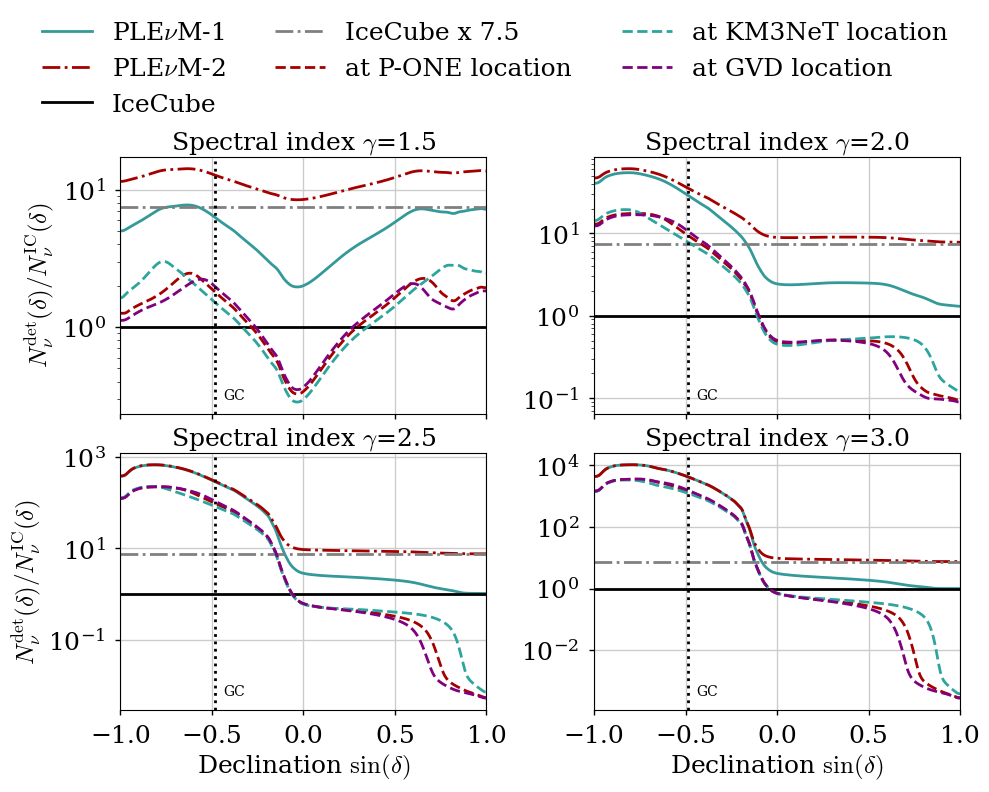

In [10]:
sindec_vals = np.linspace(-1, 1, 1000)

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(10, 8))
axes = axes.flatten()
for ii, gamma in enumerate(gammas):
    ax = axes[ii]
    for det in tcks[gamma]:
        Res = np.exp(tcks[gamma][det](sindec_vals)) / np.exp(
            tcks[gamma]["IceCube"](sindec_vals)
        )
        p = ax.plot(
            sindec_vals,
            Res,
            label=poles[det]["label"] if ii == 0 else "",
            color=poles[det]["color"],
            ls=poles[det]["ls"],
            lw=2,
        )
    ax.set_title(r"Spectral index $\gamma$={0:.1f}".format(gamma))
    ax.axvline(np.sin(sgr_a.icrs.dec), color="k", ls=":")
    # ax.axvline(np.sin(txs0506.icrs.dec), color="k", ls=":")
    ax.set_yscale("log")
    ax.set_xlim(-1, 1)
    ax.text(0.28, 0.055, "GC", transform=ax.transAxes)


axes[2].set_xlabel(r"Declination $\sin(\delta)$")
axes[3].set_xlabel(r"Declination $\sin(\delta)$")
axes[0].set_ylabel(r"$N_{\nu}^{\rm det}(\delta) / N_{\nu}^{\rm IC}(\delta)$")
axes[2].set_ylabel(r"$N_{\nu}^{\rm det}(\delta) / N_{\nu}^{\rm IC}(\delta)$")
fig.legend(loc="upper center", ncol=3, frameon=False)
fig.tight_layout()
plt.subplots_adjust(top=0.8)
fig.savefig(join(BASEPATH, "plots/relative_detection_eff_dIC_vs_sindec_wGen2.pdf"))


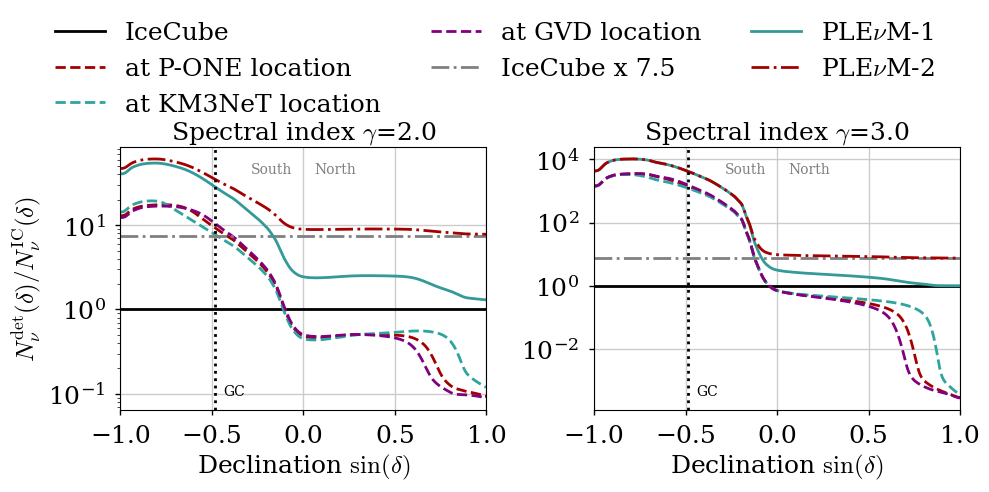

In [11]:
sindec_vals = np.linspace(-1, 1, 1000)

fig, axes = plt.subplots(ncols=2, sharex=True, figsize=(10, 5))
axes = axes.flatten()
for ii, gamma in enumerate([2.0, 3.0]):
    ax = axes[ii]
    for det in [
        "IceCube",
        "P-ONE",
        "KM3NeT",
        "Baikal-GVD",
        "Gen-2",
        "Plenum-1",
        "Plenum-2",
    ]:
        Res = np.exp(tcks[gamma][det](sindec_vals)) / np.exp(
            tcks[gamma]["IceCube"](sindec_vals)
        )
        p = ax.plot(
            sindec_vals,
            Res,
            label=poles[det]["label"] if ii == 0 else "",
            color=poles[det]["color"],
            ls=poles[det]["ls"],
            lw=2,
        )
    ax.set_title(r"Spectral index $\gamma$={0:.1f}".format(gamma))
    ax.axvline(np.sin(sgr_a.icrs.dec), color="k", ls=":")
    # ax.axvline(np.sin(txs0506.icrs.dec), color="k", ls=":")
    ax.set_yscale("log")
    ax.set_xlim(-1, 1)
    ax.text(0.28, 0.055, "GC", transform=ax.transAxes)
    ax.text(
        0.47,
        0.9,
        "South",
        transform=ax.transAxes,
        color="gray",
        ha="right",
    )
    ax.text(
        0.53,
        0.9,
        "North",
        transform=ax.transAxes,
        color="gray",
        ha="left",
    )

axes[0].set_xlabel(r"Declination $\sin(\delta)$")
axes[1].set_xlabel(r"Declination $\sin(\delta)$")
axes[0].set_ylabel(r"$N_{\nu}^{\rm det}(\delta) / N_{\nu}^{\rm IC}(\delta)$")
fig.legend(loc="upper center", ncol=3, frameon=False)
fig.tight_layout()
plt.subplots_adjust(top=0.7)
fig.savefig(join(BASEPATH, "relative_detection_eff_dIC_vs_sindec_wGen2_smaller.pdf"))


## improvement for specific sources

In [14]:
print(txs0506, ngc1068)
gamma_txs0506 = 2
n_txs0506 = 5.4
gamma_ngc1068 = 3.2
n_ngc1068 = 79 #50.4


<SkyCoord (ICRS): (ra, dec) in deg
    (77.36, 5.69)> <SkyCoord (ICRS): (ra, dec) in deg
    (40.67, -0.01)>


In [15]:
improv_txs0506_1 = np.exp(
    tcks[gamma_txs0506]["Plenum-1"](np.sin(txs0506.icrs.dec))
) / np.exp(tcks[gamma_txs0506]["IceCube"](np.sin(txs0506.icrs.dec)))
improv_txs0506_2 = np.exp(
    tcks[gamma_txs0506]["Plenum-2"](np.sin(txs0506.icrs.dec))
) / np.exp(tcks[gamma_txs0506]["IceCube"](np.sin(txs0506.icrs.dec)))
print(
    "txs0506 in icecube: n=",
    n_txs0506,
    "gamma=",
    gamma_txs0506,
)
print(
    "txs0506 in plenum-1: n=",
    improv_txs0506_1 * n_txs0506,
    f"({improv_txs0506_1})",
    ", txs0506 in plenum-2: n=",
    improv_txs0506_2 * n_txs0506,
    f"({improv_txs0506_2})",
)

improv_ngc1068_1 = np.exp(
    tcks[gamma_ngc1068]["Plenum-1"](np.sin(ngc1068.icrs.dec))
) / np.exp(tcks[gamma_ngc1068]["IceCube"](np.sin(ngc1068.icrs.dec)))
improv_ngc1068_2 = np.exp(
    tcks[gamma_ngc1068]["Plenum-2"](np.sin(ngc1068.icrs.dec))
) / np.exp(tcks[gamma_ngc1068]["IceCube"](np.sin(ngc1068.icrs.dec)))
print(
    "ngc1068 in icecube: n=",
    n_ngc1068,
    "gamma=",
    gamma_ngc1068,
)
print(
    
    "ngc1068 in plenum-1: n=",
    improv_ngc1068_1 * n_ngc1068,
    f"({improv_ngc1068_1})",
    ", ngc1068 in plenum-2: n=",
    improv_ngc1068_2 * n_ngc1068,
    f"({improv_ngc1068_2})",
)


txs0506 in icecube: n= 5.4 gamma= 2
txs0506 in plenum-1: n= 12.925016438654259 (2.3935215627137514) , txs0506 in plenum-2: n= 47.90394634969435 (8.871101175869324)
ngc1068 in icecube: n= 79 gamma= 3.2
ngc1068 in plenum-1: n= 258.4732517644766 (3.271813313474387) , ngc1068 in plenum-2: n= 770.2799034749394 (9.750378524999233)


## all detectors 
detection efficiency 1D (sin dec) relative to icecube at horizon

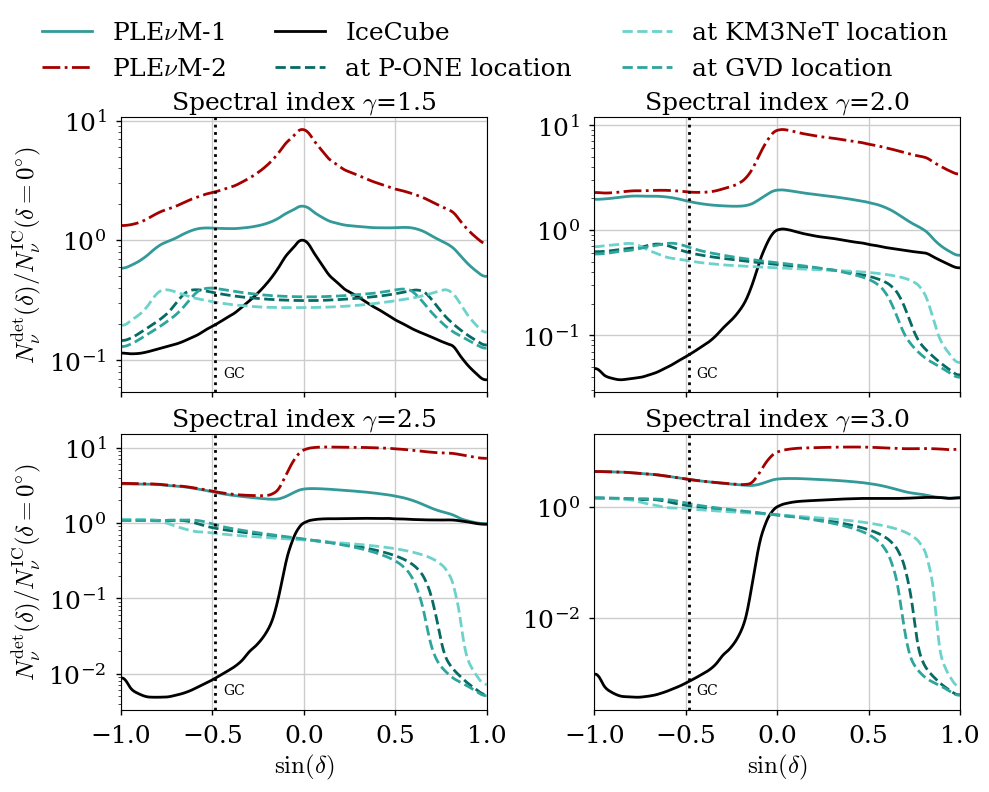

In [16]:
gammas = [1.5, 2.0, 2.5, 3.0]
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(10, 8))
axes = axes.flatten()
for ii, gamma in enumerate(gammas):
    ax = axes[ii]
    # detection efficiency of IceCube for specific spectral index at the horizon
    ## NOTE: maximum detection efficiency changes with spectral index, so we fix this to the horizon here
    arb_max_ic = np.exp(tcks[gamma]["IceCube"](0))
    for det in tcks[gamma]:
        if "Gen" in det:
            continue
        Res = np.exp(tcks[gamma][det](sindec_vals)) / arb_max_ic
        p = ax.plot(
            sindec_vals,
            Res,
            label=poles[det]["label"] if ii == 0 else "",
            color=poles[det]["color"],
            ls=poles[det]["ls"],
            lw=2,
        )
    ax.set_title(r"Spectral index $\gamma$={0:.1f}".format(gamma))
    ax.axvline(np.sin(sgr_a.icrs.dec), color="k", ls=":")
    # ax.axvline(np.sin(txs0506.icrs.dec), color="k", ls=":")
    ax.set_yscale("log")
    ax.set_xlim(-1, 1)
    ax.text(0.28, 0.055, "GC", transform=ax.transAxes)

axes[2].set_xlabel(r"$\sin(\delta)$")
axes[3].set_xlabel(r"$\sin(\delta)$")
axes[0].set_ylabel(r"$N_{\nu}^{\rm det}(\delta) / N_{\nu}^{\rm IC}(\delta=0^{\circ})$")
axes[2].set_ylabel(r"$N_{\nu}^{\rm det}(\delta) / N_{\nu}^{\rm IC}(\delta=0^{\circ})$")
fig.legend(
    loc="upper center",
    ncol=3,
    frameon=False,
)
fig.tight_layout()
plt.subplots_adjust(top=0.85)
fig.savefig(join(BASEPATH, "plots/relative_detection_eff_d0_vs_sindec.pdf"))


# Detection efficiency for each telescope in (ra,dec) for one time stamp and integrated

In [17]:
with open(join(LOCALPATH, "rel_events_ra_dec.pckl"), "rb") as f:
    rel_events_ra_dec, ra_vals, dec_vals = pickle.load(f)

with open(join(LOCALPATH, "inst_rel_events_ra_dec.pckl"), "rb") as f:
    inst_rel_events_ra_dec, ra_vals, dec_vals = pickle.load(f)


### instantaneous field of view

In [18]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.color_palette("mako", n_colors=24)[9:])


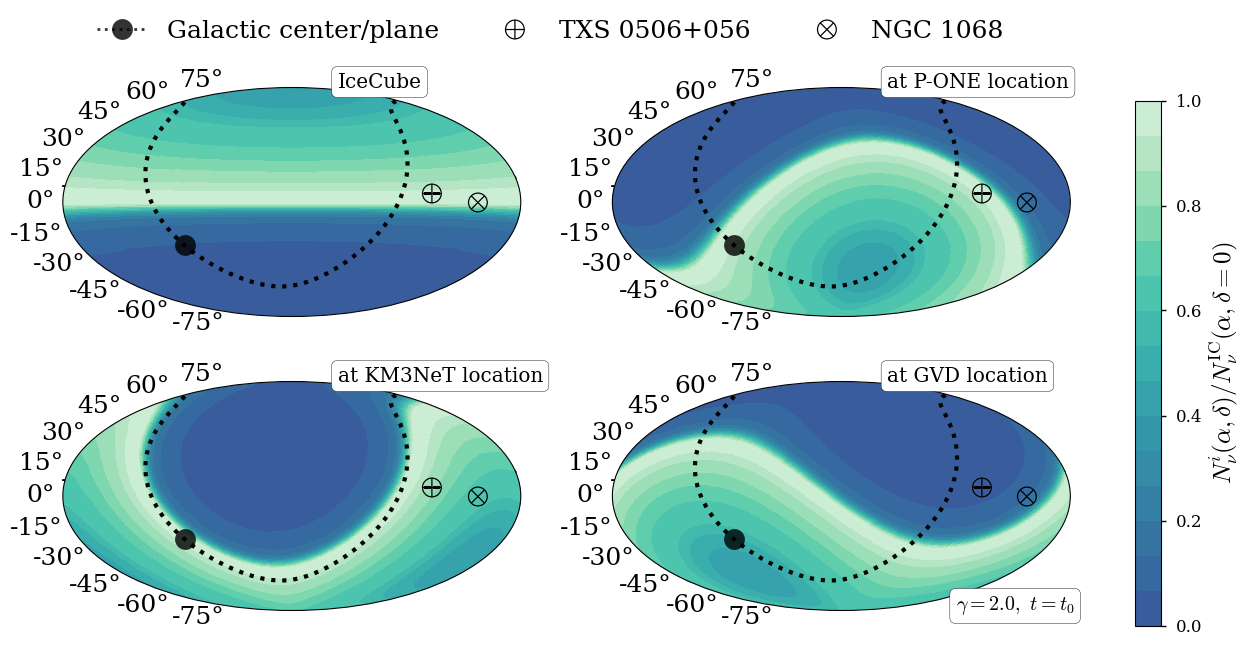

In [19]:
fig = plt.figure(figsize=(13, 7))
n2ind = {"IceCube": 221, "P-ONE": 222, "KM3NeT": 223, "Baikal-GVD": 224}
gamma = 2.0
make_legend = True
for i, (name, vals) in enumerate(inst_rel_events_ra_dec[gamma].items()):
    if "Plenum" in name or name == "Gen-2":
        continue
    ax = fig.add_subplot(n2ind[name], projection="hammer", rasterized=True)
    cax = ax.pcolormesh(ra_vals - np.pi, dec_vals, vals, vmin=0, vmax=1, cmap=cmap)
    # add the galactic center and plane
    if make_legend:
        add_plane(ax, color="black")
        add_obj(ax, "txs", marker=r"$\bigoplus$", c="k")
        add_obj(ax, "ngc", marker=r"$\bigotimes$", c="k")
        make_legend = False
    else:
        add_plane(ax, color="black", label="__None__")
        add_obj(ax, "txs", marker=r"$\bigoplus$", c="k", label="__None__")
        add_obj(ax, "ngc", marker=r"$\bigotimes$", c="k", label="__None__")
    ax.text(
        0.6,
        1.0,
        poles[name]["label"],
        fontsize="x-large",
        transform=ax.transAxes,
        bbox=dict(boxstyle="round", facecolor="w", edgecolor="k"),
    )
ax.text(
    0.75,
    0,
    rf"$\gamma={gamma},~t=t_0$",
    transform=ax.transAxes,
    fontsize="x-large",
    bbox=dict(boxstyle="round", facecolor="w", edgecolor="k"),
)
fig.legend(
    #fontsize="small",
    loc="lower center",
    ncol=3,
    frameon=False,
    bbox_to_anchor=(0.5, 0.9),
)
cbar_ax = fig.add_axes([0.95, 0.1, 0.02, 0.75])
cbar = fig.colorbar(cax, cax=cbar_ax)
cbar.set_label(
    rf"$N_{{\nu}}^{{i}}(\alpha, \delta) / N_{{\nu}}^{{\rm IC}}(\alpha, \delta=0)$"
)
cbar.ax.tick_params(labelsize="large")
fig.savefig(join(BASEPATH, "plots/skymaps_local_time.pdf"), bbox_inches="tight")


## only p-one for different times to show rotation

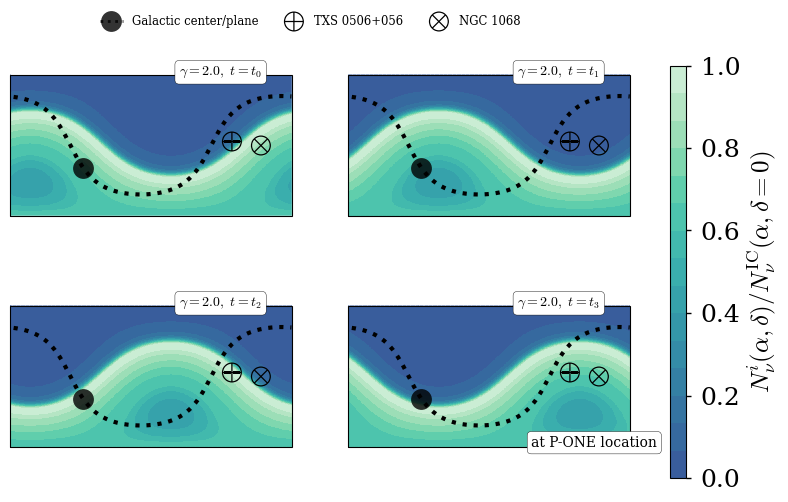

In [20]:
fig, axes = plt.subplots(
    2, 2, #figsize=(13, 7), 
    subplot_kw=dict(projection=ccrs.PlateCarree())
)
gamma = 2.0
make_legend = True
name = "P-ONE"
vals = inst_rel_events_ra_dec[gamma][name]
for i, clon in enumerate([0, 90, 180, 270]):
    ax = axes.flatten()[i]
    cax = ax.pcolormesh(
        np.rad2deg(ra_vals),
        np.rad2deg(dec_vals),
        vals,
        vmin=0,
        vmax=1,
        cmap=cmap,
        transform=ccrs.PlateCarree(central_longitude=clon),
    )
    if make_legend:
        add_plane(ax, color="black", transform=ccrs.PlateCarree())
        add_obj(ax, "txs", marker=r"$\bigoplus$", c="k", transform=ccrs.PlateCarree())
        add_obj(ax, "ngc", marker=r"$\bigotimes$", c="k", transform=ccrs.PlateCarree())
        make_legend = False
    else:
        add_plane(ax, color="black", label="__None__", transform=ccrs.PlateCarree())
        add_obj(
            ax,
            "txs",
            marker=r"$\bigoplus$",
            c="k",
            label="__None__",
            transform=ccrs.PlateCarree(),
        )
        add_obj(
            ax,
            "ngc",
            marker=r"$\bigotimes$",
            c="k",
            label="__None__",
            transform=ccrs.PlateCarree(),
        )
    ax.text(
        0.6,
        1.0,
        rf"$\gamma={gamma},~t=t_{i}$",
        #fontsize="medium",
        transform=ax.transAxes,
        bbox=dict(boxstyle="round", facecolor="w", edgecolor="k"),
    )
ax.text(
    0.65,
    0,
    poles[name]["label"],
    transform=ax.transAxes,
    #fontsize="small",
    bbox=dict(boxstyle="round", facecolor="w", edgecolor="k"),
)
fig.legend(
    fontsize="small",
    loc="lower center",
    ncol=3,
    frameon=False,
    bbox_to_anchor=(0.5, 0.9),
)
cbar_ax = fig.add_axes([0.95, 0.1, 0.02, 0.75])
cbar = fig.colorbar(cax, cax=cbar_ax)
cbar.set_label(
    rf"$N_{{\nu}}^{{i}}(\alpha, \delta) / N_{{\nu}}^{{\rm IC}}(\alpha, \delta=0)$"
)
#cbar.ax.tick_params(labelsize="large")
fig.savefig(join(BASEPATH, 'plots/skymaps_local_time.pdf'), bbox_inches="tight")


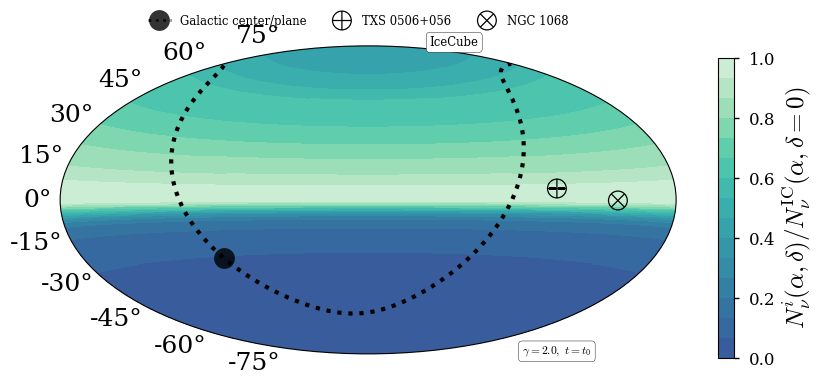

In [21]:
fig = plt.figure(figsize=(8, 4))
n2ind = {"IceCube": 111}
gamma = 2.0
make_legend = True
for i, (name, vals) in enumerate(inst_rel_events_ra_dec[gamma].items()):
    if name != "IceCube":
        continue
    ax = fig.add_subplot(n2ind[name], projection="hammer", rasterized=True)
    cax = ax.pcolormesh(ra_vals - np.pi, dec_vals, vals, vmin=0, vmax=1, cmap=cmap)
    # add the galactic center and plane
    if make_legend:
        add_plane(ax, color="black")
        add_obj(ax, "txs", marker=r"$\bigoplus$", c="k")
        add_obj(ax, "ngc", marker=r"$\bigotimes$", c="k")
        make_legend = False
    else:
        add_plane(ax, color="black", label="__None__")
        add_obj(ax, "txs", marker=r"$\bigoplus$", c="k", label="__None__")
        add_obj(ax, "ngc", marker=r"$\bigotimes$", c="k", label="__None__")
    ax.text(
        0.6,
        1.0,
        poles[name]["label"],
        fontsize="small",
        transform=ax.transAxes,
        bbox=dict(boxstyle="round", facecolor="w", edgecolor="k"),
    )
ax.text(
    0.75,
    0,
    rf"$\gamma={gamma},~t=t_0$",
    transform=ax.transAxes,
    fontsize="small",
    bbox=dict(boxstyle="round", facecolor="w", edgecolor="k"),
)
fig.legend(
    fontsize="small",
    loc="lower center",
    ncol=3,
    frameon=False,
    bbox_to_anchor=(0.5, 0.9),
)
cbar_ax = fig.add_axes([0.95, 0.1, 0.02, 0.75])
cbar = fig.colorbar(cax, cax=cbar_ax)
cbar.set_label(
    rf"$N_{{\nu}}^{{i}}(\alpha, \delta) / N_{{\nu}}^{{\rm IC}}(\alpha, \delta=0)$"
)
cbar.ax.tick_params(labelsize="large")


## time integrated

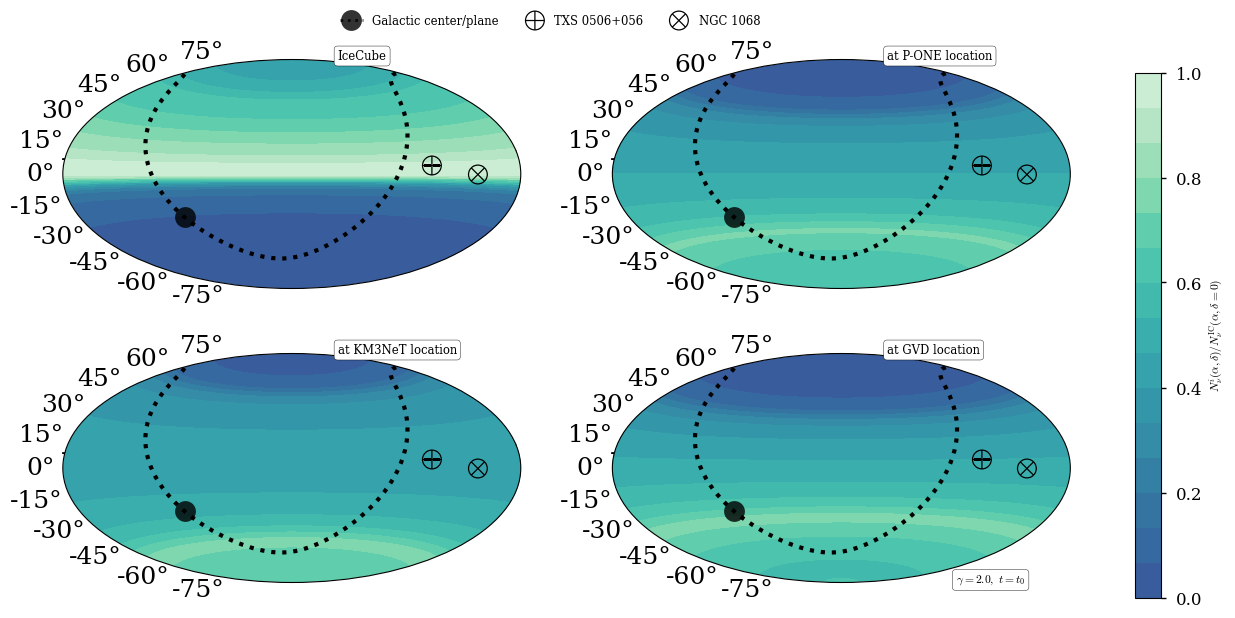

In [22]:
fig = plt.figure(figsize=(13, 7))
n2ind = {"IceCube": 221, "P-ONE": 222, "KM3NeT": 223, "Baikal-GVD": 224}
gamma = 2.0
make_legend = True
for i, (name, vals) in enumerate(rel_events_ra_dec[gamma].items()):
    if "Plenum" in name or name == "Gen-2":
        continue
    ax = fig.add_subplot(n2ind[name], projection="hammer", rasterized=True)
    cax = ax.pcolormesh(ra_vals - np.pi, dec_vals, vals, vmin=0, vmax=1, cmap=cmap)
    # add the galactic center and plane
    if make_legend:
        add_plane(ax, color="black")
        add_obj(ax, "txs", marker=r"$\bigoplus$", c="k")
        add_obj(ax, "ngc", marker=r"$\bigotimes$", c="k")
        make_legend = False
    else:
        add_plane(ax, color="black", label="__None__")
        add_obj(ax, "txs", marker=r"$\bigoplus$", c="k", label="__None__")
        add_obj(ax, "ngc", marker=r"$\bigotimes$", c="k", label="__None__")
    ax.text(
        0.6,
        1.0,
        poles[name]["label"],
        fontsize="small",
        transform=ax.transAxes,
        bbox=dict(boxstyle="round", facecolor="w", edgecolor="k"),
    )
ax.text(
    0.75,
    0,
    rf"$\gamma={gamma},~t=t_0$",
    transform=ax.transAxes,
    fontsize="small",
    bbox=dict(boxstyle="round", facecolor="w", edgecolor="k"),
)
fig.legend(
    fontsize="small",
    loc="lower center",
    ncol=3,
    frameon=False,
    bbox_to_anchor=(0.5, 0.9),
)
cbar_ax = fig.add_axes([0.95, 0.1, 0.02, 0.75])
cbar = fig.colorbar(cax, cax=cbar_ax)
cbar.set_label(
    rf"$N_{{\nu}}^{{i}}(\alpha, \delta) / N_{{\nu}}^{{\rm IC}}(\alpha, \delta=0)$",
    fontsize="small",
)
cbar.ax.tick_params(labelsize="large")
fig.savefig(join(BASEPATH, "plots/skymaps_time_integrated.pdf"), bbox_inches="tight")


### integrated field of view with (-5°,30°) band, IceCube HESE events and catalog

In [23]:
from tools import _trans


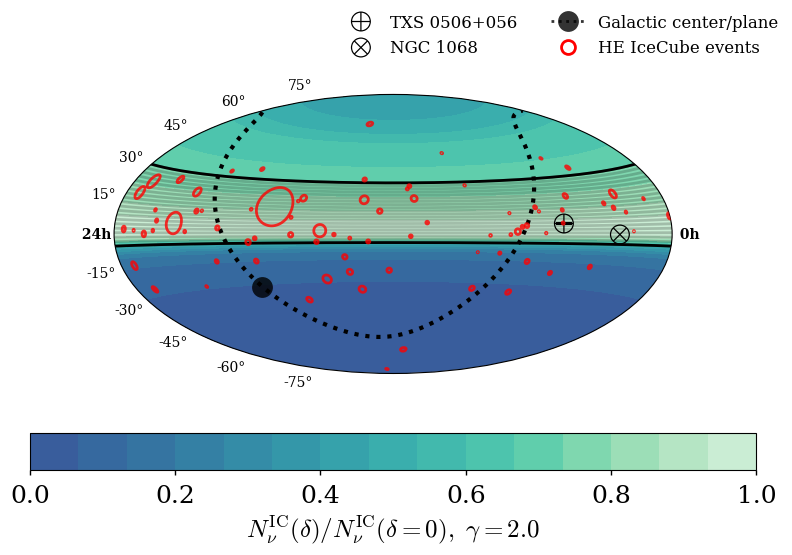

In [24]:
num = len(ra_vals)
for gamma in [2.0]:
    fig = plt.figure()  # figsize=(10, 7.0))
    ax = fig.add_subplot(111, projection="hammer", rasterized=True)
    cax = ax.pcolormesh(
        ra_vals - np.pi,
        dec_vals,
        rel_events_ra_dec[gamma]["IceCube"],
        vmin=0,
        vmax=1,
        cmap=cmap,
    )
    cbar = fig.colorbar(cax, orientation="horizontal")
    cbar.set_label(
        rf"$N_{{\nu}}^{{\rm IC}}(\delta) / N_{{\nu}}^{{\rm IC}}(\delta=0),~\gamma={gamma}$",
        # fontsize="large",
    )
    # cbar.ax.tick_params(labelsize="medium")
    # ---------------------------------------
    # show the IceCube lines between -5 and 30 deg
    # ---------------------------------------
    c = "k"  # "#DC6C25"
    y1 = np.tile(np.radians(-5.0), num)
    y2 = np.tile(np.radians(30), num)

    _x, _y1 = _trans(ra_vals, y1)
    _x, _y2 = _trans(ra_vals, y2)
    ind = np.argsort(_x)
    ax.plot(_x[ind], _y1[ind], color=c)
    ax.plot(_x[ind], _y2[ind], color=c)

    for y_i in np.linspace(-5, 30, num=20, endpoint=True):
        ytmp = np.tile(y_i, len(ra_vals))
        _x2, _y2 = _trans(ra_vals, np.radians(ytmp))
        ind = np.argsort(_x2)
        ax.plot(np.sort(_x2), _y2[ind], color=c, alpha=0.2)

    #  add also txs0506 and NGC1068
    add_obj(ax, "txs", marker=r"$\bigoplus$", c="k")
    add_obj(ax, "ngc", marker=r"$\bigotimes$", c="k")

    # add event with error radius
    for i, (rai, deci, si) in enumerate(
        zip(tracks["ra"], tracks["dec"], tracks["sigma"])
    ):
        c = "red"
        if i == 0:
            res = add_event(
                ax,
                ra_i=np.radians(rai),
                dec_i=np.radians(deci),
                sigma_i=np.radians(si),
                labels=["IceCube HE events"],
                color=c,
                linewidths=2.0,
                zorder=10,
            )
        else:
            add_event(
                ax,
                ra_i=np.radians(rai),
                dec_i=np.radians(deci),
                sigma_i=np.radians(si),
                color=c,
                linewidths=2.0,
                zorder=10,
            )

    # fix the labels
    set_ticks(ax, fs="medium")
    # add the galactic center and plane
    add_plane(ax, color="black")

    # get all legend entries and add the circle for the HE events
    handles, labels = ax.get_legend_handles_labels()
    HE_events = Line2D(
        range(1),
        range(1),
        color="red",
        marker="o",
        mew=2,
        markersize=10,
        markerfacecolor="None",
        linestyle="None",
        label="HE IceCube events",
    )
    handles.append(HE_events)
    fig.legend(
        handles=handles,
        fontsize="large",
        # mode="expand",
        ncol=2,
        frameon=False,
    )

    fig.tight_layout()
    plt.subplots_adjust(top=0.83)  # , bottom=0.2)
    # fig.savefig(
    #     f"../plots/IceCube_Skymap_horizon_gamma{int(np.round(gamma*10))}.pdf",
    #     bbox_inches="tight",
    #     dpi=200,
    # )
    # plt.show()


# Plenum improvements 
.. in discovery potential for gamma=2 and the same amount of time.
This plot shows a direct comparison of plenum and IceCube for equal run times

Idea:

* Discovery potential improvement:

$R = \frac{\Phi_0}{\Phi_{\rm new}} = \left( \frac{t_0}{t_{\rm new}} \right)^{-0.8} = \left( \frac{t_{\rm new}}{t_0} \right)^{0.8} = \left( \frac{\int dE \cdot A_{\rm eff, new} \cdot d\Phi/dE}{\int dE A_{\rm eff, 0} \cdot d\Phi/dE} \right)^{0.8}$

* Improvement relative to IceCube at horizon $(\delta=0)$:

$R_0 = \left( \frac{\int dE \cdot A_{\rm eff, new}(\delta) \cdot d\Phi/dE}{\int dE \cdot A_{\rm eff, IC}(\delta=0) \cdot d\Phi/dE} \right)^{0.8}$

* Improvement relative to IceCube at resp. declination:

$R_{rel} = \left( \frac{\int dE \cdot A_{\rm eff, new}(\delta) \cdot d\Phi/dE}{\int dE \cdot A_{\rm eff, IC}(\delta) \cdot d\Phi/dE} \right)^{0.8}$

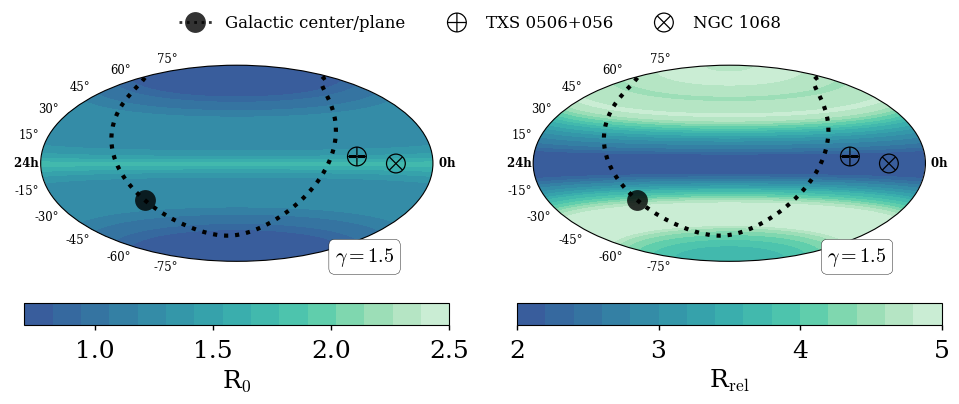

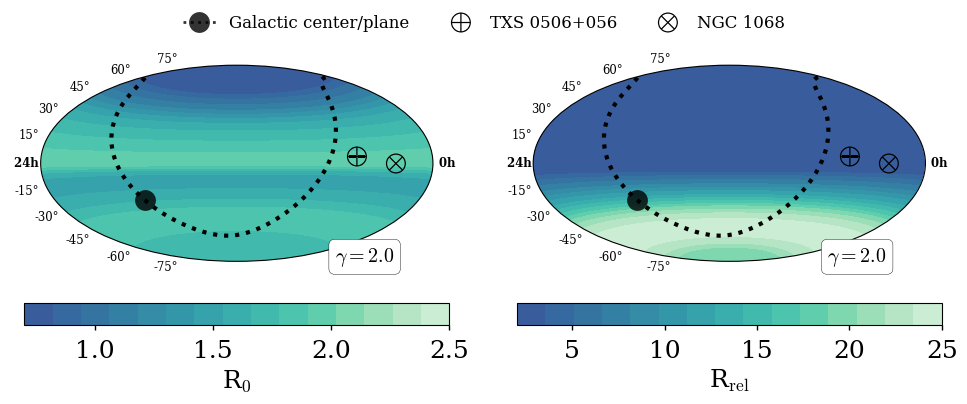

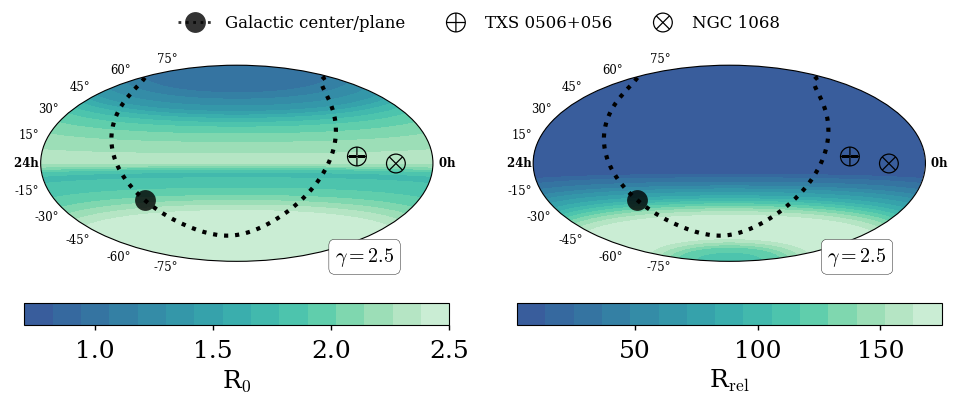

In [25]:
i2ind = {0: 121, 1: 122}
# Options:
# R0: comparison to IceCube at horizon
# R_rel: comparison to IceCube at respective declination
variation = ["r0", "rrel"]
labels = {"r0": r"R$_0$", "rrel": r"R$_{\mathrm{rel}}$"}
# min, max for colorbar, because there are some numeric hiccups at the poles
extreme = {
    1.5: {"r0": (0.7, 2.5), "rrel": (2.0, 5.0)},
    2.0: {"r0": (0.7, 2.5), "rrel": (2.0, 25.0)},
    2.5: {"r0": (0.7, 2.5), "rrel": (2.0, 175.0)},
}

for gamma in [1.5, 2.0, 2.5]:
    fig = plt.figure(figsize=(10, 4))
    for i, vari in enumerate(variation):
        ax = fig.add_subplot(i2ind[i], projection="hammer", rasterized=True)
        comb_vals = np.zeros_like(rel_events_ra_dec[gamma]["IceCube"])

        if vari == "rrel":
            mask = rel_events_ra_dec[gamma]["IceCube"] > 0.0
            comb_vals[mask] = (
                rel_events_ra_dec[gamma]["Plenum-1"][mask]
                / rel_events_ra_dec[gamma]["IceCube"][mask]
            ) ** 0.8
        else:
            comb_vals = (
                rel_events_ra_dec[gamma]["Plenum-1"]
                / rel_events_ra_dec[gamma]["IceCube"][
                    len(rel_events_ra_dec[gamma]["IceCube"]) // 2
                ]
            ) ** 0.8
        _min, _max = extreme[gamma][vari]

        cax = ax.pcolormesh(
            ra_vals - np.pi, dec_vals, comb_vals, vmin=_min, vmax=_max, cmap=cmap
        )

        cbar = fig.colorbar(cax, orientation="horizontal")
        #cbar.ax.tick_params(labelsize="small")
        cbar.set_label(labels[vari]) #, fontsize="small")
        set_ticks(ax, fs="small")
        # add the galactic center and plane
        if i == 0:
            add_plane(ax, color="black")
            add_obj(ax, "txs", marker=r"$\bigoplus$", c="k")
            add_obj(ax, "ngc", marker=r"$\bigotimes$", c="k")
        else:
            add_plane(ax, color="black", label="__None__")
            add_obj(ax, "txs", marker=r"$\bigoplus$", c="k", label="__None__")
            add_obj(ax, "ngc", marker=r"$\bigotimes$", c="k", label="__None__")
        ax.text(
            0.75,
            0,
            rf"$\gamma={gamma}$",
            transform=ax.transAxes,
            fontsize="x-large",
            bbox=dict(boxstyle="round", facecolor="w", edgecolor="k"),
        )

    fig.legend(
        fontsize="large", 
        loc="upper center", ncol=4, frameon=False
    )  # ,  mode='expand')
    fig.tight_layout()
    plt.subplots_adjust(top=0.84)  # , bottom=0.2)


# Show the time evolution of plenum

This plot will show how plenum improves (after x years) the total discovery potential if we turn it on after 10years of IceCube 

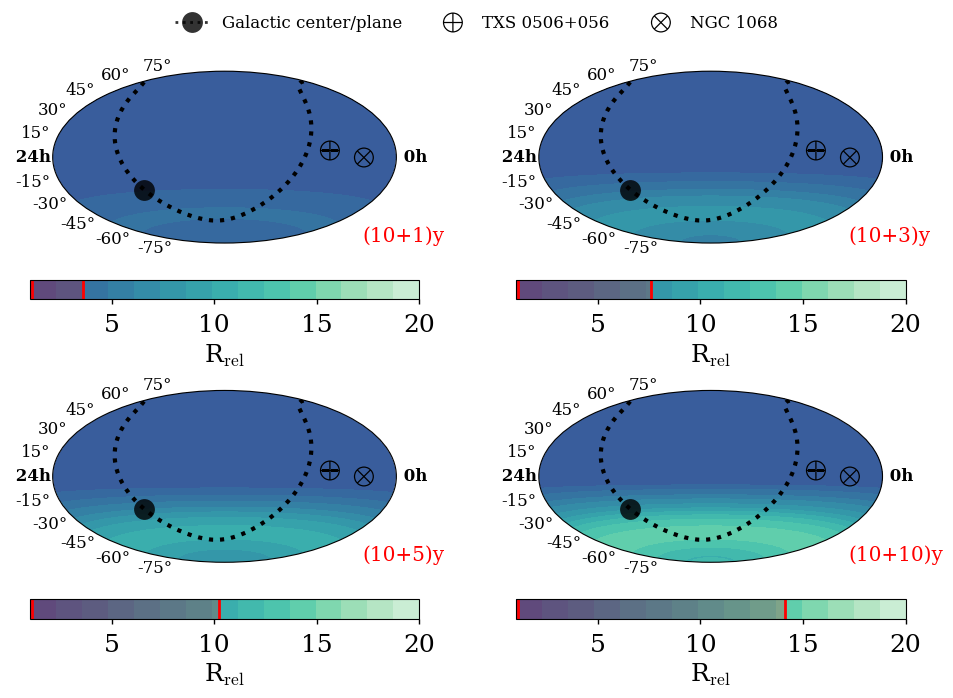

In [26]:
i2ind = {0: 221, 1: 222, 2: 223, 3: 224}
# Options:
# R0: comparison to IceCube at horizon
# R_rel: comparison to IceCube at respective declination
variation = ["r0", "rrel"]
labels = {"r0": r"R$_0$", "rrel": r"R$_{\mathrm{rel}}$"}
# min, max for colorbar, because there are some numeric hiccups at the poles
extreme = {1.0: (1.0, 20.0), 3.0: (1.0, 20.0), 5.0: (1.0, 20.0), 10.0: (1.0, 20.0)}
t_0 = 10.0  # years
t_news = [1.0, 3.0, 5.0, 10.0]  # years
gamma = 2.0
fig = plt.figure(figsize=(10, 7))
vari = "rrel"

for i, t_new in enumerate(t_news):
    comb_vals = np.zeros_like(rel_events_ra_dec[gamma]["IceCube"])
    ax = fig.add_subplot(i2ind[i], projection="hammer", rasterized=True)

    mask = rel_events_ra_dec[gamma]["IceCube"] > 0.0
    comb_vals[mask] = (
        rel_events_ra_dec[gamma]["Plenum-1"][mask]
        / rel_events_ra_dec[gamma]["IceCube"][mask]
        * t_new
        / (t_0 + t_new)
    ) ** 0.8
    _min, _max = extreme[t_new]
    cax = ax.pcolormesh(
        ra_vals - np.pi, dec_vals, comb_vals, vmin=_min, vmax=_max, cmap=cmap
    )
    cbar = fig.colorbar(cax, orientation="horizontal")
    #cbar.ax.tick_params(labelsize="large")
    cbar.set_label(labels[vari]) #, fontsize="large")

    cmarker_0 = _min + 0.005 * (_max - _min)
    cmarker_1 = np.max(comb_vals)
    cbar.ax.axvline(cmarker_0, color="red", lw=2)
    cbar.ax.axvline(cmarker_1, color="red", lw=2)
    # I have no idea how fill_between works for color axes :D
    cbar.ax.fill_between(
        [cmarker_0, cmarker_1], [-1, -1], [50, 50], color="red", alpha=0.2
    )

    set_ticks(ax, fs="large")
    # add the galactic center and plane
    if i == 0:
        add_plane(ax, color="black")
        add_obj(ax, "txs", marker=r"$\bigoplus$", c="k")
        add_obj(ax, "ngc", marker=r"$\bigotimes$", c="k")
    else:
        add_plane(ax, color="black", label="__None__")
        add_obj(ax, "txs", marker=r"$\bigoplus$", c="k", label="__None__")
        add_obj(ax, "ngc", marker=r"$\bigotimes$", c="k", label="__None__")
    ax.text(
        0.9,
        0.01,
        r"({1:d}+{0:d})y".format(int(t_new), int(t_0)),
        ha="left",
        size="x-large",
        transform=ax.transAxes,
        color="red",
    )

fig.legend(
    fontsize="large", loc="upper center", ncol=4, frameon=False
)  # ,  mode='expand')
fig.tight_layout()
plt.subplots_adjust(top=0.9)  # , bottom=0.2)


## Show ratio including Gen2 

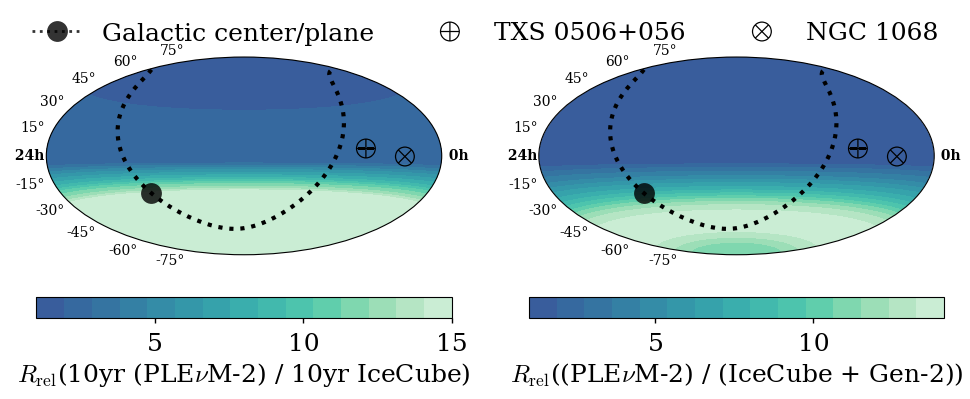

In [27]:
gamma = 2.0
fig = plt.figure(figsize=(10, 4))
vari = "rrel"
_min, _max = (1.0, 15.0)

comb_vals = np.zeros_like(rel_events_ra_dec[gamma]["IceCube"])
mask = rel_events_ra_dec[gamma]["IceCube"] > 0.0

ax = fig.add_subplot(121, projection="hammer", rasterized=True)
## 10yrs of Plenum including Gen-2 (subtracting IceCube events from original Plenum events)
## vs 20yrs of IceCube
comb_vals[mask] = (
    (rel_events_ra_dec[gamma]["Plenum-2"][mask])
    / rel_events_ra_dec[gamma]["IceCube"][mask]
) ** 0.8
cax = ax.pcolormesh(
    ra_vals - np.pi, dec_vals, comb_vals, vmin=_min, vmax=_max, cmap=cmap
)
cbar = fig.colorbar(cax, orientation="horizontal")
# cbar.ax.tick_params(labelsize="medium")
cbar.set_label(
    r"$R_{\mathrm{rel}}$(10yr (PLE$\nu$M-2) / 10yr IceCube)",  # fontsize="medium"
)

set_ticks(ax, fs="medium")
# add the galactic center and plane
add_plane(ax, color="black")
add_obj(ax, "txs", marker=r"$\bigoplus$", c="k")
add_obj(ax, "ngc", marker=r"$\bigotimes$", c="k")

comb_vals = np.zeros_like(rel_events_ra_dec[gamma]["IceCube"])
mask = rel_events_ra_dec[gamma]["IceCube"] > 0.0
ax = fig.add_subplot(122, projection="hammer", rasterized=True)
## 10yrs of Plenum including Gen-2 (subtracting IceCube events from original Plenum events)
## vs 10yrs of IceCube plus 10yrs of Gen2
comb_vals[mask] = (
    (rel_events_ra_dec[gamma]["Plenum-2"][mask])
    / (
        rel_events_ra_dec[gamma]["IceCube"][mask]
        + rel_events_ra_dec[gamma]["Gen-2"][mask]
    )
) ** 0.8
cax = ax.pcolormesh(
    ra_vals - np.pi, dec_vals, comb_vals, vmin=_min, cmap=cmap  # vmax=_max,
)
cbar = fig.colorbar(cax, orientation="horizontal")
# cbar.ax.tick_params(labelsize="medium")
cbar.set_label(
    r"$R_{\mathrm{rel}}$((PLE$\nu$M-2) / (IceCube + Gen-2))",  # fontsize="medium"
)

set_ticks(ax, fs="medium")
# add the galactic center and plane
add_plane(ax, color="black", label="__None__")
add_obj(ax, "txs", marker=r"$\bigoplus$", c="k", label="__None__")
add_obj(ax, "ngc", marker=r"$\bigotimes$", c="k", label="__None__")

fig.legend(
    # fontsize="large",
    loc="upper center",
    ncol=4,
    frameon=False,
)  # ,  mode='expand')
fig.tight_layout()
plt.subplots_adjust(top=0.85)  # , bottom=0.2)


# GIFs

Run this only if you have time and disk space left :D

Show a skymap with various rotations of the best field of view of view of all existing telescopes

In [28]:
raise BaseException("C:")

BaseException: C:

In [6]:
### make a gif
import imageio
num_gifs = 100

In [ ]:
images = []
for ii, clon in enumerate(np.linspace(360, 0, num=num_gifs)):
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(projection=ccrs.Mollweide(central_longitude=clon))
    ax.set_global()
    ax.coastlines(color="k", alpha=0.7, lw=1)
    ax.gridlines(draw_labels=False, dms=True, x_inline=False, y_inline=False, zorder=0)
    ax.text(-0.01, 0.5, "24h", transform=ax.transAxes, ha="right")
    ax.text(1.01, 0.5, "0h", transform=ax.transAxes, ha="left")
    ax.text(0.15, 0.9, "60°N", transform=ax.transAxes, ha="right", va="center")
    ax.text(0.02, 0.7, "30°N", transform=ax.transAxes, ha="right", va="center")
    ax.text(0.02, 0.3, "30°S", transform=ax.transAxes, ha="right", va="center")
    ax.text(0.15, 0.1, "60°S", transform=ax.transAxes, ha="right", va="center")

    if True:
        add_obj(
            ax,
            "txs",
            marker=r"$\bigoplus$",
            c="k",
            transform=ccrs.PlateCarree(central_longitude=clon),
            markeredgewidth=2,
            zorder=10,
        )
        add_obj(
            ax,
            "ngc",
            marker=r"$\bigotimes$",
            c="k",
            transform=ccrs.PlateCarree(central_longitude=clon),
            markeredgewidth=2,
            zorder=10,
        )
        add_plane(
            ax, color="black", transform=ccrs.PlateCarree(central_longitude=clon), zorder=10
        )

    zen_min = -30
    zen_max = 5
    azi = np.linspace(0, 360, num=200)
    zen1 = np.full_like(azi, zen_min)
    zen2 = np.full_like(azi, zen_max)
    for k in poles:
        ax.scatter(
            poles[k]["lon"].value,
            poles[k]["lat"].value,
            color=poles[k]["color"],
            marker="s",
            s=100,
            transform=ccrs.PlateCarree(),
            label=k,
            zorder=10,
        )
        rotated_crs = ccrs.RotatedPole(
            pole_longitude=poles[k]["lon"].value,
            pole_latitude=poles[k]["lat"].value,
        )
        ax.plot(
            azi, zen1, transform=rotated_crs, color=poles[k]["color"], lw=1, alpha=1
        )
        ax.plot(
            azi, zen2, transform=rotated_crs, color=poles[k]["color"], lw=1, alpha=1
        )

        for i in range(zen_min, zen_max, 2):
            zen = np.full_like(azi, i)
            ax.plot(
                azi,
                zen,
                transform=rotated_crs,
                color=poles[k]["color"],
                lw=2,
                alpha=0.1,
            )
    plt.subplots_adjust(top=0.8)
    ax.legend(
        fontsize="large",
        loc="lower center",
        ncol=3,
        frameon=False,
        bbox_to_anchor=(0.5, 1.0),
    )
    # fig.tight_layout()
    base_file = join(BASEPATH, f"plots/maps/best_field_of_view_map_{ii}_P-ONE_forGIF")
    fig.savefig(base_file + ".png", dpi=80)
    images.append(imageio.imread(base_file + ".png"))
imageio.mimsave(
    join(BASEPATH, f"plots/maps/best_field_of_view_map_P-ONE_lowres.gif"), images, format="gif"
)


In [8]:
import glob, os
for f in glob.glob(join(BASEPATH, f"plots/maps/best_field_of_view_map_*_P-ONE_forGIF.png")):
    os.remove(f)

In [ ]:
# InterruptedGoodeHomolosine

images = []
for ii, clon in enumerate(np.linspace(360, 0, num=num_gifs)):
    fig = plt.figure()  # figsize=(5, 5))
    ax = fig.add_subplot(
        projection=ccrs.InterruptedGoodeHomolosine(central_longitude=clon)
    )
    ax.set_global()
    ax.coastlines(color="k", alpha=0.7, lw=1)
    ax.gridlines(draw_labels=False, dms=True, x_inline=False, y_inline=False, zorder=0)
    ax.text(-0.01, 0.5, "0°", transform=ax.transAxes, ha="right")
    ax.text(0.15, 0.9, "60°N", transform=ax.transAxes, ha="right", va="center")
    ax.text(0.02, 0.7, "30°N", transform=ax.transAxes, ha="right", va="center")
    ax.text(0.02, 0.3, "30°S", transform=ax.transAxes, ha="right", va="center")
    ax.text(0.15, 0.1, "60°S", transform=ax.transAxes, ha="right", va="center")

    zen_min = -30
    zen_max = 5
    azi = np.linspace(0, 360, num=200)
    zen1 = np.full_like(azi, zen_min)
    zen2 = np.full_like(azi, zen_max)
    for k in poles:
        ax.scatter(
            poles[k]["lon"].value,
            poles[k]["lat"].value,
            color=poles[k]["color"],
            marker="s",
            s=100,
            transform=ccrs.PlateCarree(),
            label=k,
            zorder=10,
        )
        rotated_crs = ccrs.RotatedPole(
            pole_longitude=poles[k]["lon"].value,
            pole_latitude=poles[k]["lat"].value,
        )
        ax.plot(
            azi, zen1, transform=rotated_crs, color=poles[k]["color"], lw=1, alpha=1
        )
        ax.plot(
            azi, zen2, transform=rotated_crs, color=poles[k]["color"], lw=1, alpha=1
        )

        for i in range(zen_min, zen_max, 2):
            zen = np.full_like(azi, i)
            ax.plot(
                azi,
                zen,
                transform=rotated_crs,
                color=poles[k]["color"],
                lw=2,
                alpha=0.1,
            )
    plt.subplots_adjust(top=0.8)
    ax.legend(
        fontsize="large",
        loc="lower center",
        ncol=3,
        frameon=False,
        bbox_to_anchor=(0.5, 1.0),
    )
    # fig.tight_layout()
    base_file = join(
        BASEPATH,
        f"plots/maps/best_field_of_view_map_{ii}_P-ONE-InterruptedGoodeHomolosine",
    )
    fig.savefig(base_file + ".png", dpi=100)
    images.append(imageio.imread(base_file + ".png"))
imageio.mimsave(
    join(
        BASEPATH,
        f"plots/maps/best_field_of_view_map_P-ONE-InterruptedGoodeHomolosine.gif",
    ),
    images,
    format="gif",
)


In [ ]:
images = []
for ii, clon in enumerate(np.linspace(360, 0, num=num_gifs)):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection=ccrs.Orthographic(central_longitude=clon))
    ax.set_global()
    ax.coastlines(color="k", alpha=0.7, lw=1)
    ax.gridlines(draw_labels=False, dms=True, x_inline=False, y_inline=False, zorder=0)
    ax.text(-0.01, 0.5, "0°", transform=ax.transAxes, ha="right")
    ax.text(0.15, 0.9, "60°N", transform=ax.transAxes, ha="right", va="center")
    ax.text(0.02, 0.7, "30°N", transform=ax.transAxes, ha="right", va="center")
    ax.text(0.02, 0.3, "30°S", transform=ax.transAxes, ha="right", va="center")
    ax.text(0.15, 0.1, "60°S", transform=ax.transAxes, ha="right", va="center")

    zen_min = -30
    zen_max = 5
    azi = np.linspace(0, 360, num=200)
    zen1 = np.full_like(azi, zen_min)
    zen2 = np.full_like(azi, zen_max)
    for k in poles:
        ax.scatter(
            poles[k]["lon"].value,
            poles[k]["lat"].value,
            color=poles[k]["color"],
            marker="s",
            s=100,
            transform=ccrs.PlateCarree(),
            label=k,
            zorder=10,
        )
        rotated_crs = ccrs.RotatedPole(
            pole_longitude=poles[k]["lon"].value,
            pole_latitude=poles[k]["lat"].value,
        )
        ax.plot(
            azi, zen1, transform=rotated_crs, color=poles[k]["color"], lw=1, alpha=1
        )
        ax.plot(
            azi, zen2, transform=rotated_crs, color=poles[k]["color"], lw=1, alpha=1
        )

        for i in range(zen_min, zen_max, 2):
            zen = np.full_like(azi, i)
            ax.plot(
                azi,
                zen,
                transform=rotated_crs,
                color=poles[k]["color"],
                lw=2,
                alpha=0.1,
            )
    plt.subplots_adjust(top=0.8)
    ax.legend(
        fontsize="large",
        loc="lower center",
        ncol=2,
        frameon=False,
        bbox_to_anchor=(0.5, 1.0),
    )
    # fig.tight_layout()
    base_file = join(
        BASEPATH, f"plots/maps/best_field_of_view_map_{ii}_P-ONE-orthographic"
    )
    fig.savefig(base_file + ".png", dpi=100)
    images.append(imageio.imread(base_file + ".png"))
imageio.mimsave(
    join(BASEPATH, f"plots/maps/best_field_of_view_map_P-ONE-orthographic.gif"),
    images,
    format="gif",
)
